In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#### Import library ####
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

In [14]:
#### Vectors ####

a = [-27, -17, -15, -3, 11, -4, -1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']
b = [-27, 17, -15, -3, -11, -4, 1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 'EOB']
c = [-27, -17, 15, -3, -11, -4, -1, 0, 0, 1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 'EOB']
d = [-27, 17, 15, -3, 11, -4, 1, 0, 0, 1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']

In [15]:
#### Matrix Quantization ####

Z = np.array([[16,11,10,16,24,40,51,61],
              [12,12,14,19,26,58,60,55],
              [14,13,16,24,40,57,69,56],
              [14,17,22,29,51,87,80,62],
              [18,22,37,56,68,109,103,77],
              [24,35,55,64,81,104,113,92],
              [49,64,78,87,103,121,120,101],
              [72,92,95,98,112,100,130,99]])

In [16]:
#### Define Image Show Function ####
def image_show(image):
  return plt.imshow(image, cmap='gray')

In [17]:
#### Define vector_to_matrix Function ####
def vector_to_matrix(vector, k=8):

  matrix = []
  matrix = (k*k) * [0]
  zigzag =[[] for i in range(k+k-1)]
  val = 0
  for i in range(k):
      for j in range(k):
          sum=i+j
          if(sum%2 ==0):
  
              #add at beginning
              zigzag[sum].insert(0,val)
          else:
  
              #add at end of the list
              zigzag[sum].append(val)
          val += 1
  indexes = []
  for i in zigzag:
    for j in i:
      indexes.append(j)

  vector[-1] = 0

  vector += (len(indexes) - len(vector)) * [0]
  v = 0
  for idx in indexes:
    matrix[idx] = vector[v]
    v += 1
  matrix = np.reshape(matrix, (k,k))

  return matrix
vector_to_matrix(a)

array([[-27, -17,  -4,  -1,   0,   0,   0,   0],
       [-15,  11,   0,   0,   0,   0,   0,   0],
       [ -3,   0,   2,   0,   0,   0,   0,   0],
       [ -1,   0,   0,   1,   0,   0,   0,   0],
       [ -1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [18]:
#### Define JPEG Decompression Function #####

def jpeg_decompress(T_hat, Z):

  # Please set norm='ortho' in Discrete Cosine Transform Function in fftpack
  k = Z.shape[0]
  T_dot = np.multiply(T_hat, Z)
  T_dot = fftpack.idct(fftpack.idct(T_dot.T, norm='ortho').T, norm='ortho').astype(int)
  sum_value = np.power(2, k-1)
  T_dot = T_dot + sum_value
  return T_dot


# **A)**

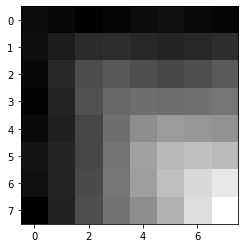

In [19]:
####  Decompress Vector "a"  ####
#### Show Decompressed Image ####
T_hat_a = vector_to_matrix(a)
T_dot_a = jpeg_decompress(T_hat_a, Z)
# print(img_a)
# plt.imshow(img_a, cmap='gray')
image_show(T_dot_a)

# **B)**

In [20]:
#### Decompress Vector "b", "c" And "d" ####
T_hat_b = vector_to_matrix(b)
T_dot_b = jpeg_decompress(T_hat_b, Z)
T_hat_c = vector_to_matrix(c)
T_dot_c = jpeg_decompress(T_hat_c, Z)
T_hat_d = vector_to_matrix(d)
T_dot_d = jpeg_decompress(T_hat_d, Z)
# print(T_hat_b)
# print(T_dot_b)

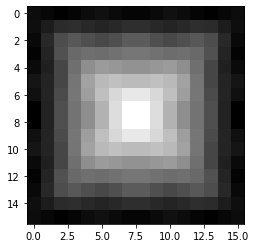

In [21]:
#### Concatenate Decompressed Images ####
####     Show Concatenated Image     ####
image = np.zeros((16,16))
image[0:8, 0:8] = T_dot_a
image[0:8, 8:] = T_dot_b
image[8:, 0:8] = T_dot_c
image[8:, 8:] = T_dot_d
image_show(image)